In [1]:
%autosave 60

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Autosaving every 60 seconds


# Linear regression with one variable

In [2]:
# x = [1, 2, 3, 4, 5]
# y = [0.5, 2, 2.5, 4, 4.5]

data = pd.read_csv('data/linear_reg1.txt', header=None)
data = np.array(data.values, dtype = np.float64)

x = np.expand_dims(data[:, 0], axis=1)
x = np.insert(x, 0, 1, axis=1)

y = data[:, 1]

print(x.shape, y.shape)

(97, 2) (97,)


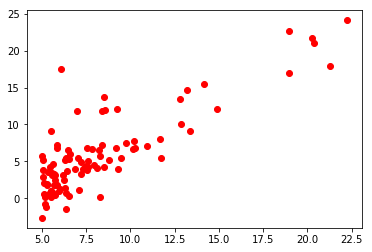

In [3]:
plt.plot(x[:,1], y, 'ro')
plt.show()

In [4]:
# MSE cost function
def mse(x, theta, y, m):
    error = np.sum(np.square(x.dot(theta)-y))
    return error

In [5]:
def train(x, y, m, lr, itr):
    np.random.seed(0)
    
    history = []
    
    theta = np.random.randn(len(x[0]))
    theta = np.expand_dims(theta, axis=1)
    
    # calculations are done without vectorization
    for i in range(itr):
        h = theta[0] + (theta[1]*x[:,1])
        
        # np.multiply finds product of an element from 1st array and 
        # the corresponding element on same position of 2nd array. Eg:
        # >>> a
        # array([0.83311065, 0.09033762])
        # >>> b
        # array([0.23645678, 0.36961283])
        # >>> np.multiply(a,b)
        # array([0.19699466, 0.03338995])
        diff1 = np.sum(h - y)/m
        diff2 = (x[:,1].T.dot(h - y))/m
        
        # Update learning parameters theta
        theta[0] = theta[0] - lr*diff1
        theta[1] = theta[1] - lr*diff2
        
        history.append(mse(x, theta, y, len(x)))
    
    return theta, history

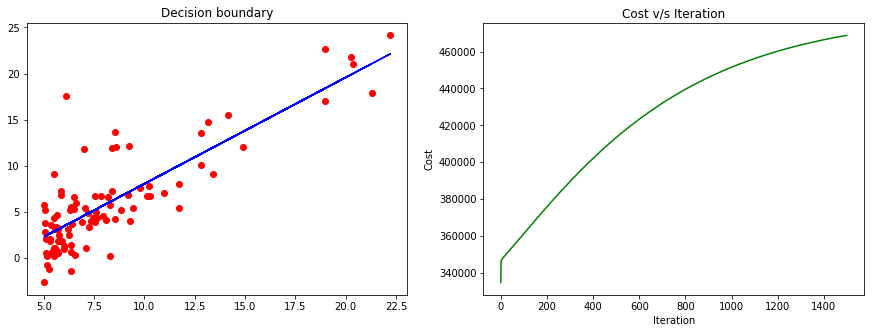

In [6]:
lr = 0.01
itr = 1500
theta, history = train(x, y, len(x), lr, itr)
out = x.dot(theta)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(x[:,1], y, 'ro')
ax1.plot(x[:,1], out, 'b')
ax1.title.set_text('Decision boundary')

ax2.plot(range(itr), history, 'g')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Cost')
ax2.title.set_text('Cost v/s Iteration')

# Linear regression with multiple variables

In [7]:
data_multi = pd.read_csv('data/linear_reg2.txt', header=None)
data_multi = np.array(data_multi.values, dtype = np.float64)

# Feature normalization
for i in range(len(data_multi[0])):
    data_multi[:,i] = data_multi[:,i]/(max(data_multi[:,i]) - min(data_multi[:,i]))

split = int(0.9*len(data_multi))
x_multi = data_multi[:split, :2]
# For utilizing vectorization later
x_multi = np.insert(x_multi, 0, 1, axis=1)
y_multi = np.expand_dims(data_multi[:split, 2], axis=1)

test_x_multi = data_multi[split:, :2]
test_x_multi = np.insert(test_x_multi, 0, 1, axis=1)
test_y_multi = np.expand_dims(data_multi[split:, 2], axis=1)

x_multi.shape, y_multi.shape

((42, 3), (42, 1))

In [8]:
def train_multi(x_multi, y_multi, m, lr, itr):
    np.random.seed(0)
    num_ftrs = len(x_multi[0])
    
    history = []
    
    theta = np.random.rand(num_ftrs)
    theta = np.expand_dims(theta, axis=1)
    
    # utilizing vectorization unlike in case of single variable in above section
    for i in range(itr):
        h = x_multi.dot(theta)
        diff = x_multi.T.dot(h - y_multi)/m   
        # vectorization
        theta = theta - lr*diff
        history.append(mse(x_multi, theta, y_multi, len(x_multi)))
    
    return theta, history

lr	itr	error
0.01	50	0.7124015948338699
0.01	100	0.21771557251520107
0.01	200	0.08242465129269774
0.01	500	0.06624819345449262
0.03	50	0.10845598251035167
0.03	100	0.06923250003549244
0.03	200	0.06557401818297172
0.03	500	0.06179920483673783
0.001	50	3.004823476970948
0.001	100	2.5335663873436585
0.001	200	1.8152904260997877
0.001	500	0.7215690107101016
0.003	50	2.13951319969169
0.003	100	1.3135790170984512
0.003	200	0.5459012744352512
0.003	500	0.11243841620615751

Lowest error:0.06179920483673783 for lr:0.03 and itr:500

Plotting graph for lowest error...


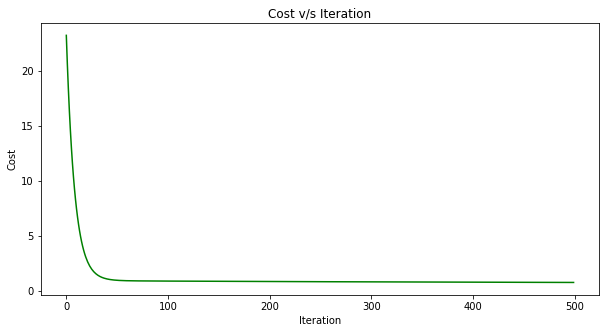

In [9]:
best_history = None
best_lr = best_itr = 0
prev_cost = 1

print('lr\titr\terror')
for lr in [0.01, 0.03, 0.001, 0.003]:
    for itr in [50, 100, 200, 500]:
        theta, history = train_multi(x_multi, y_multi, len(x_multi), lr, itr)
        # loss on test data
        curr_cost = mse(test_x_multi, theta, test_y_multi, len(test_x_multi))
        print('{}\t{}\t{}'.format(lr, itr, curr_cost))
        if curr_cost < prev_cost:
            prev_cost = curr_cost
            best_theta = theta
            best_lr = lr
            best_itr = itr
            best_history = history
            
print('\nLowest error:{} for lr:{} and itr:{}'.format(prev_cost, best_lr, best_itr))
print('\nPlotting graph for lowest error...')
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(10)

ax.plot(range(best_itr), best_history, 'g')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.title.set_text('Cost v/s Iteration')